In [1]:
data_path = "data/DataChallenge_GBDentalClaims.xlsx"

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
metadata = pd.read_excel(data_path, sheet_name='data_summary')
data = pd.read_excel(data_path, sheet_name='dataset') 

In [4]:
data = data.set_index('ee_id')
data.head()

,policy number,member_id,language,gender,pol_renewal_dt,days_exposure_dental,num_claims,total_num_serv_lines,sum_charge_amt,sum_paid_amt,...,ftr_env_pct_household_2person,ftr_env_pct_household_3person,ftr_env_pct_household_4person,ftr_env_pct_household_5person,pol_renewal_yr,ftr_years_since_cert_effective,ftr_age_at_renewal,MARKET_SEGMENT_ADJ,industry,province
ee_id,,,,,,,,,,,,,,,,,,,,,
3433_3433,3433,3433,E,M,2018-06-01,365,NaN,NaN,NaN,NaN,...,0.272997,0.181009,0.148368,0.183976,2018,1.750685,50.750685,SUNADVANTAGE,retail_trade,ontario
3433_38,3433,38,E,M,2017-06-01,365,NaN,NaN,NaN,NaN,...,0.483271,0.111524,0.083643,0.029740,2017,5.254795,54.613699,SUNADVANTAGE,retail_trade,ontario
3447_8,3447,8,E,F,2019-06-01,366,5.0,16.0,1366.0,1052.8,...,0.327586,0.068966,0.034483,0.000000,2019,11.257534,51.739726,SUNADVANTAGE,service_repair_business,ontario
3473_9,3473,9,E,M,2017-06-01,365,NaN,NaN,NaN,NaN,...,0.314815,0.055556,0.018519,0.000000,2017,9.257534,45.279452,SUNSOLUTIONS,service_repair_business,saskatchewan
3498_1073,3498,1073,E,M,2019-07-01,366,2.0,8.0,402.0,301.6,...,0.434783,0.130435,0.173913,0.043478,2019,0.246575,47.646575,SUNADVANTAGE,manufacturing,ontario


In [5]:
data.columns

Index(['policy number', 'member_id', 'language', 'gender', 'pol_renewal_dt',
       'days_exposure_dental', 'num_claims', 'total_num_serv_lines',
       'sum_charge_amt', 'sum_paid_amt',
       ...
       'ftr_env_pct_household_2person', 'ftr_env_pct_household_3person',
       'ftr_env_pct_household_4person', 'ftr_env_pct_household_5person',
       'pol_renewal_yr', 'ftr_years_since_cert_effective',
       'ftr_age_at_renewal', 'MARKET_SEGMENT_ADJ', 'industry', 'province'],
      dtype='object', length=232)

In [6]:
data[['sum_charge_amt', 'sum_paid_amt_after_cob']].dropna().corr()

,sum_charge_amt,sum_paid_amt_after_cob
sum_charge_amt,1.000000,0.775395
sum_paid_amt_after_cob,0.775395,1.000000


In [7]:
charges = [
'sum_charge_amt',
'sum_paid_amt',
'sum_adj_amt',
'sum_paid_amt_cldld',
'sum_paid_amt_after_cob',
'sum_lab_chrg_amt',
'num_claims_dep',
'total_num_serv_lines_dep',
'sum_charge_amt_dep',
'sum_paid_amt_dep',
'sum_adj_amt_dep',
'sum_paid_amt_cldld_dep',
'sum_paid_amt_after_cob_dep',
'sum_dent_chrg_amt_dep',
'sum_lab_chrg_amt_dep',
]

In [8]:
data[charges].corr()

,sum_charge_amt,sum_paid_amt,sum_adj_amt,sum_paid_amt_cldld,sum_paid_amt_after_cob,sum_lab_chrg_amt,num_claims_dep,total_num_serv_lines_dep,sum_charge_amt_dep,sum_paid_amt_dep,sum_adj_amt_dep,sum_paid_amt_cldld_dep,sum_paid_amt_after_cob_dep,sum_dent_chrg_amt_dep,sum_lab_chrg_amt_dep
sum_charge_amt,1.000000,0.775395,0.766126,0.803758,0.775395,0.600624,0.606539,0.592274,0.792704,0.647908,0.644282,0.685298,0.647908,0.785331,0.409755
sum_paid_amt,0.775395,1.000000,0.993512,0.972304,1.000000,0.259050,0.665697,0.640883,0.683008,0.844418,0.841352,0.812865,0.844418,0.697625,0.210762
sum_adj_amt,0.766126,0.993512,1.000000,0.966345,0.993512,0.249129,0.663160,0.638775,0.678035,0.839427,0.845244,0.808496,0.839427,0.692279,0.211029
sum_paid_amt_cldld,0.803758,0.972304,0.966345,1.000000,0.972304,0.265654,0.703281,0.688724,0.732191,0.825289,0.822375,0.861646,0.825289,0.747494,0.228421
sum_paid_amt_after_cob,0.775395,1.000000,0.993512,0.972304,1.000000,0.259050,0.665697,0.640883,0.683008,0.844418,0.841352,0.812865,0.844418,0.697625,0.210762
sum_lab_chrg_amt,0.600624,0.259050,0.249129,0.265654,0.259050,1.000000,0.097155,0.077557,0.327665,0.150139,0.151009,0.164020,0.150139,0.253121,0.654535
num_claims_dep,0.606539,0.665697,0.663160,0.703281,0.665697,0.097155,1.000000,0.932404,0.786400,0.816659,0.813371,0.846165,0.816659,0.814279,0.167681
total_num_serv_lines_dep,0.592274,0.640883,0.638775,0.688724,0.640883,0.077557,0.932404,1.000000,0.774397,0.790912,0.787959,0.833164,0.790912,0.804980,0.143887
sum_charge_amt_dep,0.792704,0.683008,0.678035,0.732191,0.683008,0.327665,0.786400,0.774397,1.000000,0.811444,0.805331,0.857083,0.811444,0.991918,0.508636
sum_paid_amt_dep,0.647908,0.844418,0.839427,0.825289,0.844418,0.150139,0.816659,0.790912,0.811444,1.000000,0.994373,0.957285,1.000000,0.830709,0.237500


In [9]:
(data['sum_paid_amt_after_cob'].fillna(0) == data['sum_paid_amt'].fillna(0)).sum()

8000

In [10]:
data.describe()

,policy number,days_exposure_dental,num_claims,total_num_serv_lines,sum_charge_amt,sum_paid_amt,sum_adj_amt,sum_paid_amt_cldld,sum_paid_amt_after_cob,sum_lab_chrg_amt,...,ftr_env_avg_household_income,ftr_env_med_household_income,ftr_env_pct_household_1person,ftr_env_pct_household_2person,ftr_env_pct_household_3person,ftr_env_pct_household_4person,ftr_env_pct_household_5person,pol_renewal_yr,ftr_years_since_cert_effective,ftr_age_at_renewal
count,8000.000000,8000.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,8000.000000,5051.000000,...,7.301000e+03,7.301000e+03,7301.000000,7301.000000,7301.000000,7301.000000,7301.000000,8000.000000,8000.000000,8000.000000
mean,83225.450125,314.606500,5.314591,14.934666,1814.719036,1100.486163,1088.407462,1180.342465,694.819451,91.435888,...,1.160202e+05,9.827180e+04,0.225864,0.322259,0.167132,0.167322,0.108383,2018.173625,4.964452,42.286137
std,57741.340551,99.948519,4.427571,12.082607,2221.059836,1109.119092,1101.929518,1171.333379,1028.847205,378.846018,...,6.381570e+04,4.905757e+04,0.177612,0.128185,0.088279,0.111493,0.131247,0.767172,6.418374,15.251130
min,3433.000000,1.000000,1.000000,1.000000,27.140000,0.000000,-1313.120000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,-1.000000,16.947945
25%,25277.000000,344.000000,2.000000,6.000000,525.000000,365.000000,358.555000,388.050000,0.000000,0.000000,...,7.877269e+04,6.620185e+04,0.096774,0.250000,0.125000,0.090909,0.024096,2018.000000,0.706849,29.756164
50%,78180.000000,365.000000,4.000000,11.000000,1099.000000,751.720000,750.000000,821.000000,313.600000,0.000000,...,1.055488e+05,9.176735e+04,0.193548,0.333333,0.166667,0.159091,0.080645,2018.000000,2.587671,41.145205
75%,150237.250000,365.000000,7.000000,20.000000,2252.500000,1462.000000,1457.185000,1575.000000,998.985000,0.000000,...,1.377351e+05,1.212416e+05,0.307692,0.400000,0.212121,0.241379,0.142857,2019.000000,7.005479,53.393151
max,187990.000000,366.000000,49.000000,114.000000,24669.000000,9619.000000,9619.000000,11010.340000,9619.000000,6651.000000,...,1.221580e+06,1.019458e+06,1.000000,1.000000,1.000000,1.000000,1.000000,2019.000000,45.197260,99.000000


In [11]:
metadata['Feature Category'].value_counts()

Dental Claim usage during the most recent benefit year    49
Prior 1 Year Claim Usage                                  40
Prior 2 Years Claim Usage                                 40
Prior 3 Years Claim Usage                                 39
Employee demographic features                             24
Third Party Environics Information Postal Code Level      15
Dental Policy level information                           14
Policy Renewal Details                                     2
Member Demographic                                         2
Sponsor Industry                                           1
Sunlife Benefit Type                                       1
Member age at renewal                                      1
unique ID                                                  1
Sponsor, ex Coca Cola, Nike, etc…                          1
Member Policy Details                                      1
Employee at a Sponsor                                      1
Member Province         

In [12]:
amt_category = 'Dental Claim usage during the most recent benefit year'
current_year_variables = metadata[metadata["Feature Category"] == amt_category]["Feature"].values

In [13]:
data_df = data[['sum_paid_amt_after_cob'] + [col for col in data.columns if col not in current_year_variables]]

In [14]:
data_df.head()

,sum_paid_amt_after_cob,policy number,member_id,language,gender,pol_renewal_dt,days_exposure_dental,ftr_employee_age_as_of_renewal,ftr_employee_spouse_age_as_of_renewal,ftr_employee_son_age_as_of_renewal,...,ftr_env_pct_household_2person,ftr_env_pct_household_3person,ftr_env_pct_household_4person,ftr_env_pct_household_5person,pol_renewal_yr,ftr_years_since_cert_effective,ftr_age_at_renewal,MARKET_SEGMENT_ADJ,industry,province
ee_id,,,,,,,,,,,,,,,,,,,,,
3433_3433,0.0,3433,3433,E,M,2018-06-01,365,51.0,55.0,21.0,...,0.272997,0.181009,0.148368,0.183976,2018,1.750685,50.750685,SUNADVANTAGE,retail_trade,ontario
3433_38,0.0,3433,38,E,M,2017-06-01,365,55.0,56.0,NaN,...,0.483271,0.111524,0.083643,0.029740,2017,5.254795,54.613699,SUNADVANTAGE,retail_trade,ontario
3447_8,1052.8,3447,8,E,F,2019-06-01,366,52.0,59.0,NaN,...,0.327586,0.068966,0.034483,0.000000,2019,11.257534,51.739726,SUNADVANTAGE,service_repair_business,ontario
3473_9,0.0,3473,9,E,M,2017-06-01,365,45.0,46.0,10.0,...,0.314815,0.055556,0.018519,0.000000,2017,9.257534,45.279452,SUNSOLUTIONS,service_repair_business,saskatchewan
3498_1073,301.6,3498,1073,E,M,2019-07-01,366,48.0,40.0,NaN,...,0.434783,0.130435,0.173913,0.043478,2019,0.246575,47.646575,SUNADVANTAGE,manufacturing,ontario


In [15]:
y = data_df.fillna(0)['sum_paid_amt_after_cob']
X = data_df.fillna(0)[[col for col in data_df.columns if col != 'sum_paid_amt_after_cob']]

In [16]:
y.head()

ee_id
3433_3433       0.0
3433_38         0.0
3447_8       1052.8
3473_9          0.0
3498_1073     301.6
Name: sum_paid_amt_after_cob, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [18]:
LR = LinearRegression()

In [19]:
def process_dummies(df):
    """Get a dataframe and convert all columns to dummy variables with proper names"""
    df_out = pd.DataFrame({})
    for col in df.columns:
        dummied =pd.get_dummies(df[col], drop_first = True)
        dummied.columns = [f"{col}_{dcol}" for dcol in dummied.columns]
        if len(df_out) == 0:
            df_out = dummied
        else:
            df_out = pd.concat([df_out, dummied], axis = 1)
    return df_out

In [20]:
X_numeric = X.select_dtypes(include=np.number)
X_numeric = X_numeric.drop(columns=['policy number'])
X_numeric.columns

Index(['days_exposure_dental', 'ftr_employee_age_as_of_renewal',
       'ftr_employee_spouse_age_as_of_renewal',
       'ftr_employee_son_age_as_of_renewal',
       'ftr_employee_daughter_age_as_of_renewal',
       'ftr_employee_household_size', 'ftr_employee_number_dependents',
       'ftr_employee_number_children_dependent',
       'ftr_employee_number_other_dependent',
       'ftr_employee_spouse_dependent_flag',
       ...
       'ftr_env_avg_household_income', 'ftr_env_med_household_income',
       'ftr_env_pct_household_1person', 'ftr_env_pct_household_2person',
       'ftr_env_pct_household_3person', 'ftr_env_pct_household_4person',
       'ftr_env_pct_household_5person', 'pol_renewal_yr',
       'ftr_years_since_cert_effective', 'ftr_age_at_renewal'],
      dtype='object', length=174)

In [21]:
categorical_columns = [col for col in X.columns if col not in X_numeric.columns]
categorical_columns.remove('pol_renewal_dt')
categorical_columns.append('policy number')
X_categorical = X[categorical_columns]
X_categorical.head()

,policy number,member_id,language,gender,cde_marital_status_eeeb,MARKET_SEGMENT_ADJ,industry,province,policy number
ee_id,,,,,,,,,
3433_3433,3433,3433,E,M,M,SUNADVANTAGE,retail_trade,ontario,3433
3433_38,3433,38,E,M,M,SUNADVANTAGE,retail_trade,ontario,3433
3447_8,3447,8,E,F,M,SUNADVANTAGE,service_repair_business,ontario,3447
3473_9,3473,9,E,M,M,SUNSOLUTIONS,service_repair_business,saskatchewan,3473
3498_1073,3498,1073,E,M,M,SUNADVANTAGE,manufacturing,ontario,3498


In [22]:
X_categorical = X_categorical.drop(columns=['member_id'])
catgorical_features = process_dummies(X_categorical)
catgorical_features.head()

,policy number_policy number,policy number_policy number,language_F,gender_M,gender_U,cde_marital_status_eeeb_M,cde_marital_status_eeeb_S,MARKET_SEGMENT_ADJ_NATIONAL ACCOUNTS,MARKET_SEGMENT_ADJ_SPONSORED MARKETS - Association,MARKET_SEGMENT_ADJ_SUNADVANTAGE,...,province_saskatchewan,province_tennessee,province_texas,province_unknown,province_virginia,province_washington,province_wisconsin,province_yukon_territories,policy number_policy number,policy number_policy number
ee_id,,,,,,,,,,,,,,,,,,,,,
3433_3433,3433,3433,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,3433,3433
3433_38,3433,3433,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,3433,3433
3447_8,3447,3447,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,3447,3447
3473_9,3473,3473,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,3473,3473
3498_1073,3498,3498,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,3498,3498


In [23]:
date_features = data['pol_renewal_dt'].dt.year.rename('year').to_frame()
date_features['month'] = data['pol_renewal_dt'].dt.month
date_features['weekday'] = data['pol_renewal_dt'].dt.dayofweek
date_features = process_dummies(date_features)
date_features.head()

,year_2018,year_2019,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
ee_id,,,,,,,,,,,,,,,,,,,
3433_3433,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3433_38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3447_8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3473_9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3498_1073,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
processed_data = pd.concat([y, X_numeric, catgorical_features, date_features], axis=1)
processed_data.head()

,sum_paid_amt_after_cob,days_exposure_dental,ftr_employee_age_as_of_renewal,ftr_employee_spouse_age_as_of_renewal,ftr_employee_son_age_as_of_renewal,ftr_employee_daughter_age_as_of_renewal,ftr_employee_household_size,ftr_employee_number_dependents,ftr_employee_number_children_dependent,ftr_employee_number_other_dependent,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
ee_id,,,,,,,,,,,,,,,,,,,,,
3433_3433,0.0,365,51.0,55.0,21.0,0.0,3,2,1,0,...,0,0,0,0,0,0,0,1,0,0
3433_38,0.0,365,55.0,56.0,0.0,0.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3447_8,1052.8,366,52.0,59.0,0.0,22.0,3,2,1,0,...,0,0,0,0,0,0,0,0,1,0
3473_9,0.0,365,45.0,46.0,10.0,0.0,3,2,1,0,...,0,0,0,0,0,0,1,0,0,0
3498_1073,301.6,366,48.0,40.0,0.0,0.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = processed_data.query('sum_paid_amt_after_cob > 0').iloc[:,0]
features = processed_data.query('sum_paid_amt_after_cob > 0').iloc[:,1:]

In [42]:
LR_Reg = LinearRegression()
EN_Reg = ElasticNet()
SVR_Reg = SVR()
XGB_Reg = XGBRegressor(objective='reg:squarederror')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    features.values, y.values,
    test_size = 0.25,
    shuffle=True
)
len(X_train), len(y_train)

(3736, 3736)

In [45]:
for model in [LR_Reg, EN_Reg, SVR_Reg, XGB_Reg]:
    print(f"Fitting model: {model}")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)
    #print(f"MSE: {mse}\n r2: {r2}")
    print(f"r2 train: {r2_score(y_train, y_pred_train)}, r2 test: {r2_score(y_test, y_pred)}")

Fitting model: LinearRegression()
r2 train: 0.32080239780146846, r2 test: 0.20676241174938148
Fitting model: ElasticNet()
r2 train: 0.29275671698805816, r2 test: 0.22762544456224187
Fitting model: SVR()
r2 train: -0.08895170922070506, r2 test: -0.08902288804146874
Fitting model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
r2 train: 0.9614714499702378, r2 test: 0.163

In [46]:
XGB_Reg.fit(X_train, y_train)
y_pred = XGB_Reg.predict(X_test)
r2_score(y_test, y_pred)

0.16321033147497088

In [47]:
pred_results = pd.DataFrame({'y':y_test, 'y_pred':y_pred}).query("y == 0")

<AxesSubplot:xlabel='y', ylabel='y_pred'>

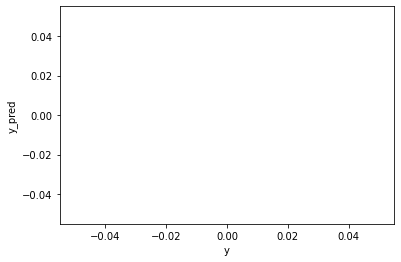

In [48]:
pred_results.plot.scatter(x = 'y', y='y_pred')

In [49]:
r2_score(pred_results.y, pred_results.y_pred)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
len(pred_results)

In [ ]:
pd.DataFrame({'y':y_test, 'y_pred':y_pred}).query("y == 0")['y_pred'].hist()

In [ ]:
y_log.hist()

In [ ]:
X_numeric.corr()

In [ ]:
corr_matrix = X_numeric.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[[corr_matrix.columns[x],corr_matrix.columns[y]] for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
reg = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
reg.fit(X_train, y_train)

In [37]:
print("Best parameters:", reg.best_params_)
print("Lowest RMSE: ", (-reg.best_score_)**(1/2.0))

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Lowest RMSE:  947.9688080770616


In [39]:
y_pred = reg.predict(X_test)

In [40]:
r2_score(y_test, y_pred)

0.20836317607340016

In [50]:
r2_score(y_train, reg.predict(X_train))

0.4070080614333371

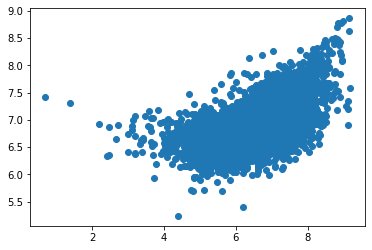

In [57]:
plt.scatter(np.log(y_train), np.log(reg.predict(X_train)))

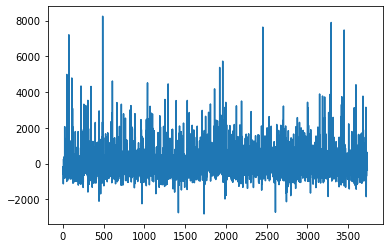

In [59]:
plt.plot(y_train -reg.predict(X_train))